# Экономика. Всероссийская олимпиада школьников

Все визуализации всероса. Результаты можно найти тут -> https://t.me/AD_olimp

# Установка и импорт необходимых библиотек

In [3]:
!pip install seaborn, colour, joypy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 4.1 MB/s eta 0:00:002.0 MB/s eta 0:00:01


In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import joypy
import seaborn as sns
%matplotlib inline

from colour import Color
import string
import random

# Необходимые функции и константы

In [56]:
PATH = 'data/'
COLOR = '#2F80ED'
GREY = '#BDBDBD'
GREEN = '#219653'
LIGHTGREEN = '#6FCF97'
LIGHT_COLOR = '#abccf8'

In [6]:
def RGB_TO_HEX(r, g, b):
    return '#%02x%02x%02x' % (r, g, b)

## Результативность регионов на ЗЭ ВОШ

In [57]:
df = pd.read_csv(PATH + 'Рейтинг регионов по итогам Всероссийской олимпиады 2023 года.txt', sep='\t')

In [58]:
for year in ['2015', '2017', '2019', '2021', '2022', '2023']:
    df[year] =  df[year].apply(lambda x: x.replace(',', '.')).astype(float)

In [59]:
COLOR

'#2F80ED'

In [60]:
colors = list(map(lambda x: x.hex, Color("white").range_to(Color(COLOR), steps=6)))[1:]
colors

['#eceae5', '#d4e1c3', '#99dda3', '#68e1d0', '#2f80ed']

Text(0.0, 1.0, 'Результативность регионов на ЗЭ ВОШ')

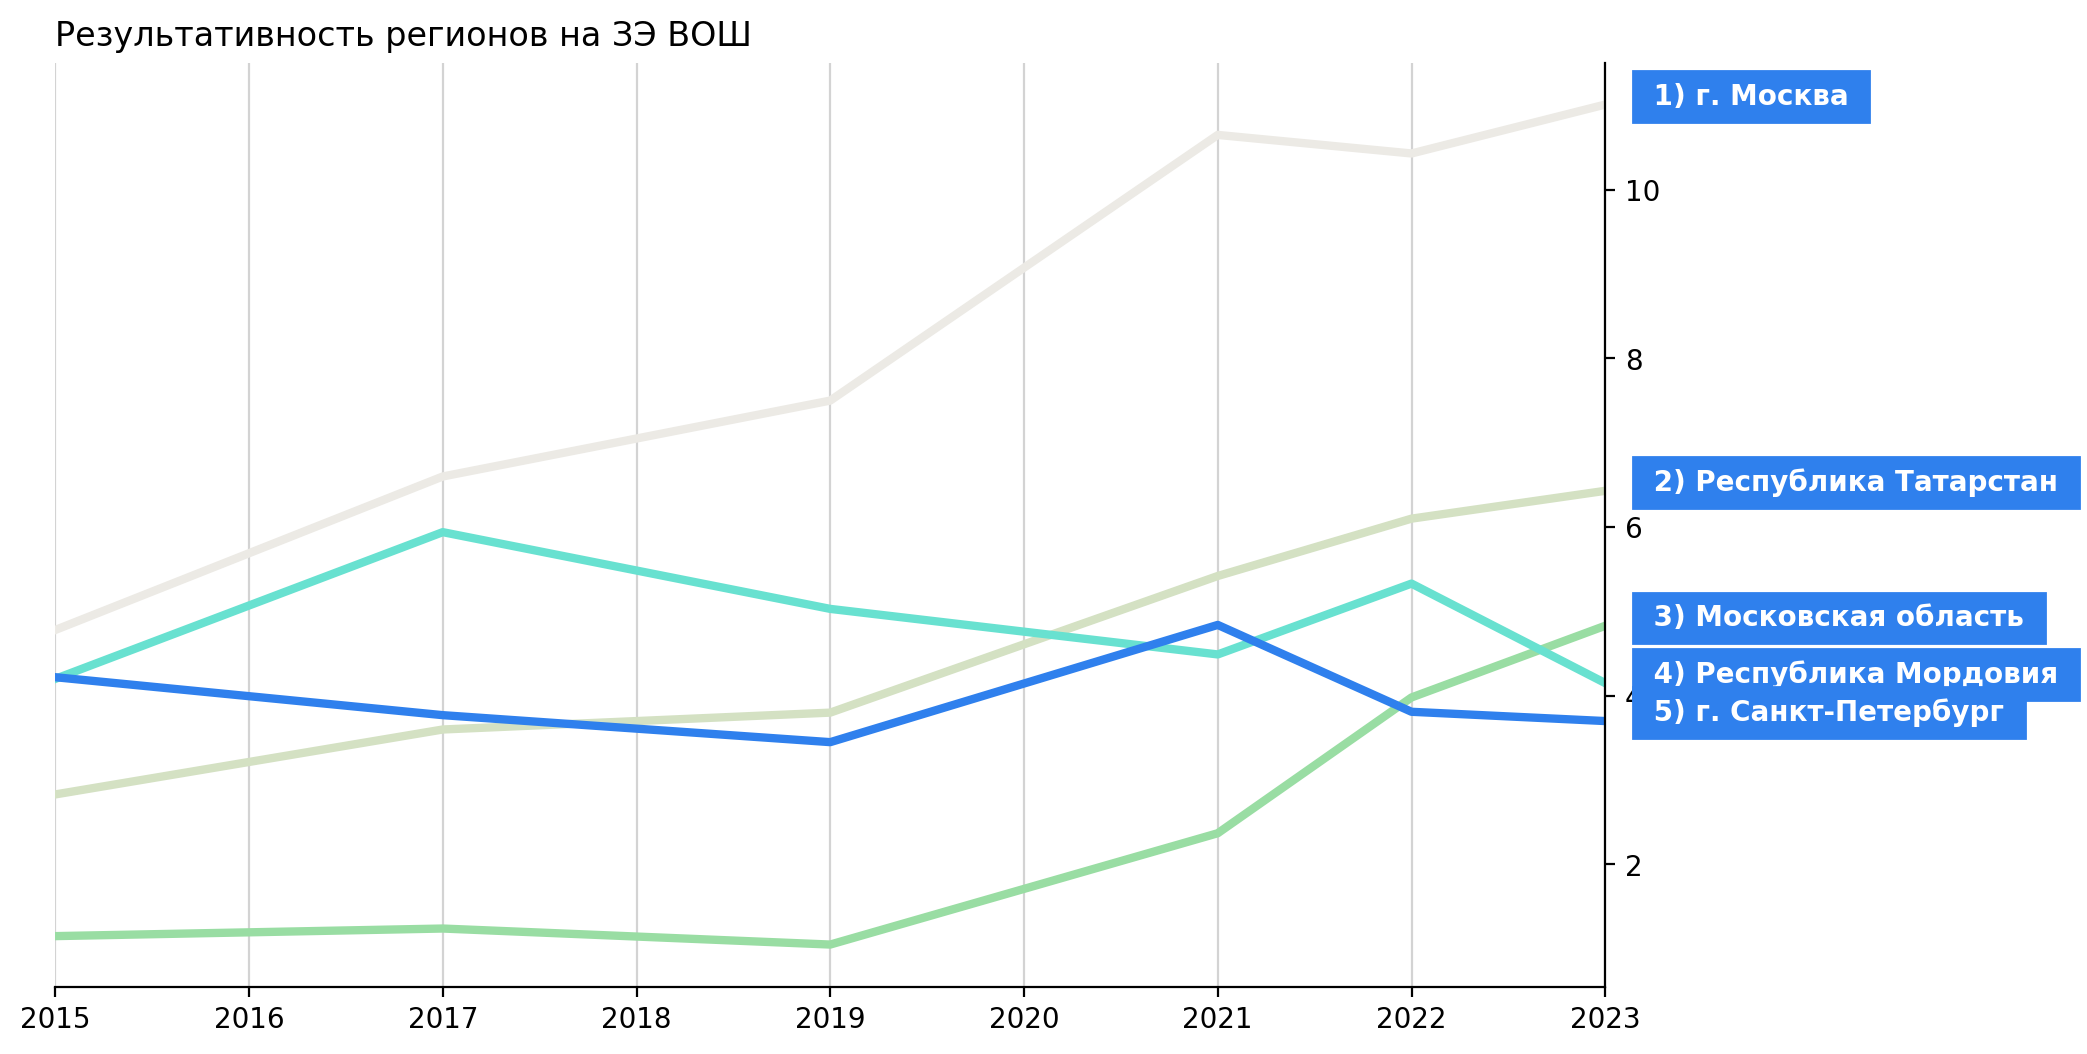

In [64]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)

ax.yaxis.tick_right()

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


x = [2015, 2017, 2019, 2021, 2022, 2023]
for region in df.iloc[:5]['Регион']:
    y = df[df['Регион'] == region].iloc[0, 2:]
    
    index = df[df['Регион'] == region].index[0]
    
    ax.plot(x, y, linewidth=3, color=colors[index])
        
    plt.text(s=f" {index + 1}) {region} ", x=x[-1] + 0.2, y=y[-1], 
             color='white',
             fontdict={'weight': 'bold'},
             bbox={'facecolor': COLOR, 'edgecolor': COLOR}
    )
    
ax.set_xlim(2015, 2023)
    
ax.grid(
    axis='x',
    color='lightgrey'
)

ax.set_title('Результативность регионов на ЗЭ ВОШ', loc='left')

# Результативность стран на IEO 

In [65]:
df = pd.read_excel(PATH + 'Межнар 2023.xlsx')

In [66]:
df.head(3)

,Unnamed: 0,Name,Surname,Country,Financial Literacy,Economics,Business Case,Total,Award
0,1,Daniel,Zhang,Canada,42.349,100.000,40.905,183.253,Gold
1,2,Alp,Yalçın,Türkiye,46.809,93.250,40.905,180.964,Gold
2,3,Muhammad Amadeus Ihsan,Candra,Indonesia,47.447,95.766,32.952,176.166,Gold


In [24]:
df.Award.unique()

array(['Gold', 'Silver', 'Bronze', nan], dtype=object)

In [25]:
a = pd.DataFrame(columns=['Country', 'Gold', 'Silver', 'Bronze'])
    
for i, country in enumerate(df.Country.unique()):
    gold = df[(df.Country == country) & (df.Award == 'Gold')].shape[0]
    silver = df[(df.Country == country) & (df.Award == 'Silver')].shape[0]
    bronze = df[(df.Country == country) & (df.Award == 'Bronze')].shape[0]
    tmp = pd.DataFrame({'Country': country, 'Gold': gold, 'Silver': silver, 'Bronze': bronze}, index=[i])
    
    a = pd.concat([a, tmp])

In [26]:
a = a.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False).reset_index(drop=True)
a = a.reset_index().rename(columns={'index': 'place'})

In [27]:
df['Place'] = df['Country'].apply(lambda x: a[a.Country == x].place.iloc[0] + 1)

In [31]:
df\
    .groupby('Country', as_index=False)\
    .agg({'Business Case': 'mean'})\
    .sort_values(by='Business Case', ascending=False)\
    .reset_index(drop=True).head(5)

,Country,Business Case
0,Hong Kong,46.585
1,Malaysia,43.177
2,Taiwan,42.041
3,Singapore,40.905
4,Romania,40.905


In [32]:
tmp = df[df.Country == 'Russia']

In [33]:
tmp = df
tmp.head(3)

,Unnamed: 0,Name,Surname,Country,Financial Literacy,Economics,Business Case,Total,Award,Place
0,1,Daniel,Zhang,Canada,42.349,100.000,40.905,183.253,Gold,3
1,2,Alp,Yalçın,Türkiye,46.809,93.250,40.905,180.964,Gold,9
2,3,Muhammad Amadeus Ihsan,Candra,Indonesia,47.447,95.766,32.952,176.166,Gold,1


In [34]:
tmp['Economics'] = (tmp['Economics'] - tmp['Economics'].min()) / (tmp['Economics'].max() - tmp['Economics'].min())
tmp['Financial Literacy'] = (tmp['Financial Literacy'] - tmp['Financial Literacy'].min()) / (tmp['Financial Literacy'].max() - tmp['Financial Literacy'].min())
tmp['Business Case'] = (tmp['Business Case'] - tmp['Business Case'].min()) / (tmp['Business Case'].max() - tmp['Business Case'].min())

Text(0.5, 1.0, 'Results of the Russian national team at the IEO')

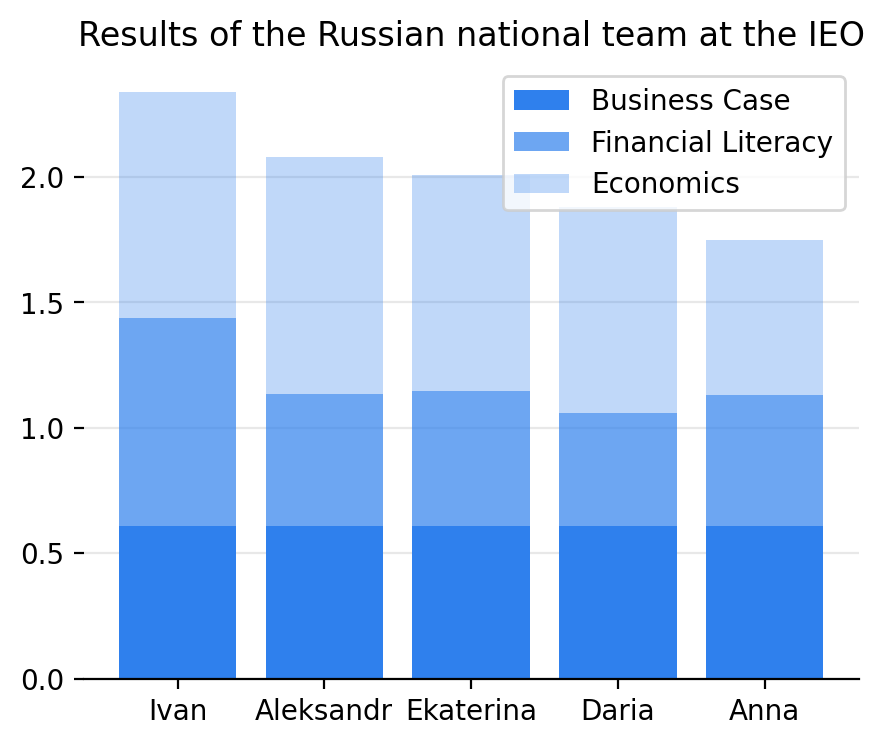

In [35]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=200)

for spine in ax.spines:
    if spine != 'bottom': ax.spines[spine].set_visible(False)

tmp = tmp[tmp.Country == 'Russia']
        
ax.bar(
    x=tmp.Name,
    height=tmp['Business Case'],
    color=COLOR,
    label='Business Case',
    zorder=2
)

ax.bar(
    x=tmp.Name,
    height=tmp['Financial Literacy'],
    bottom=tmp['Business Case'],
    color=COLOR,
    alpha=0.7,
    label='Financial Literacy',
    zorder=2
)

ax.bar(
    x=tmp.Name,
    height=tmp['Economics'],
    bottom=tmp['Business Case'] + tmp['Financial Literacy'],
    color=COLOR,
    alpha=0.3,
    label='Economics',
    zorder=2
)

ax.legend()
ax.grid(axis='y', color='lightgrey', alpha=0.5, zorder=0)

plt.title('Results of the Russian national team at the IEO')

(0.0, 6.0)

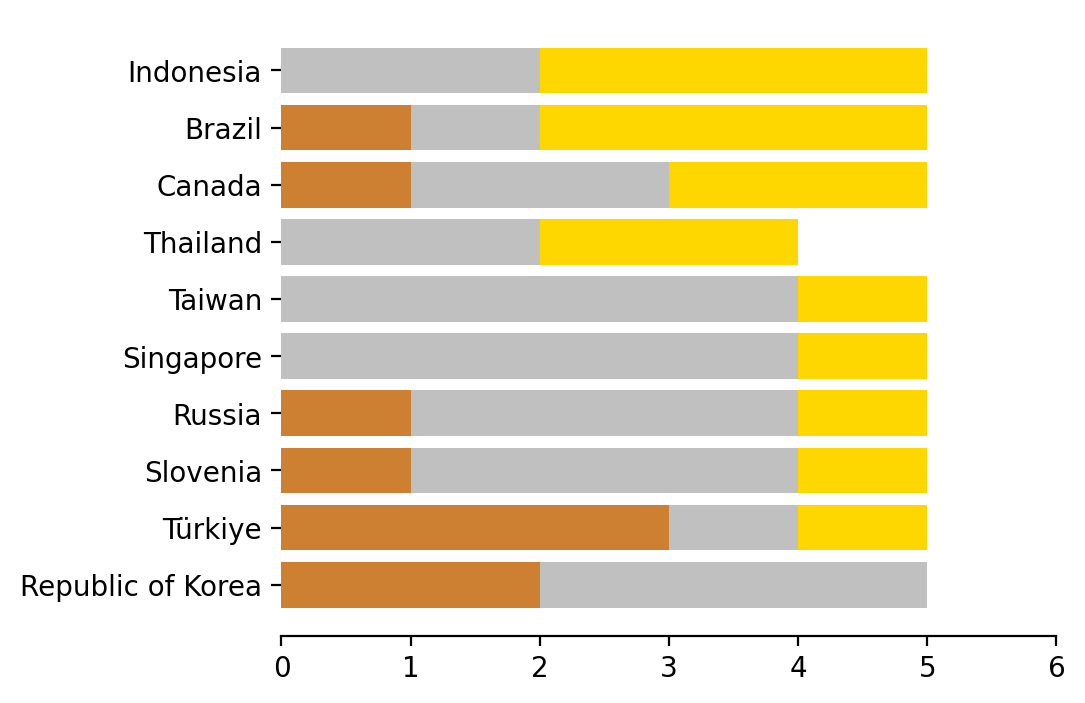

In [36]:
tmp = a[a.place <= 9].sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=True)

fig, ax = plt.subplots(figsize=(5, 4), dpi=200)

for spine in ax.spines:
    if spine != 'bottom': ax.spines[spine].set_visible(False)

ax.barh(
    y=tmp.Country,
    width=tmp.Bronze,
    color='#cd7f32'
)

ax.barh(
    y=tmp.Country,
    width=tmp.Silver,
    left=tmp.Bronze,
    color='silver'
)

ax.barh(
    y=tmp.Country,
    width=tmp.Gold,
    left=tmp.Bronze + tmp.Silver,
    color='gold',
)

ax.set_xlim([0, 6])

/home/misha/.local/lib/python3.11/site-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


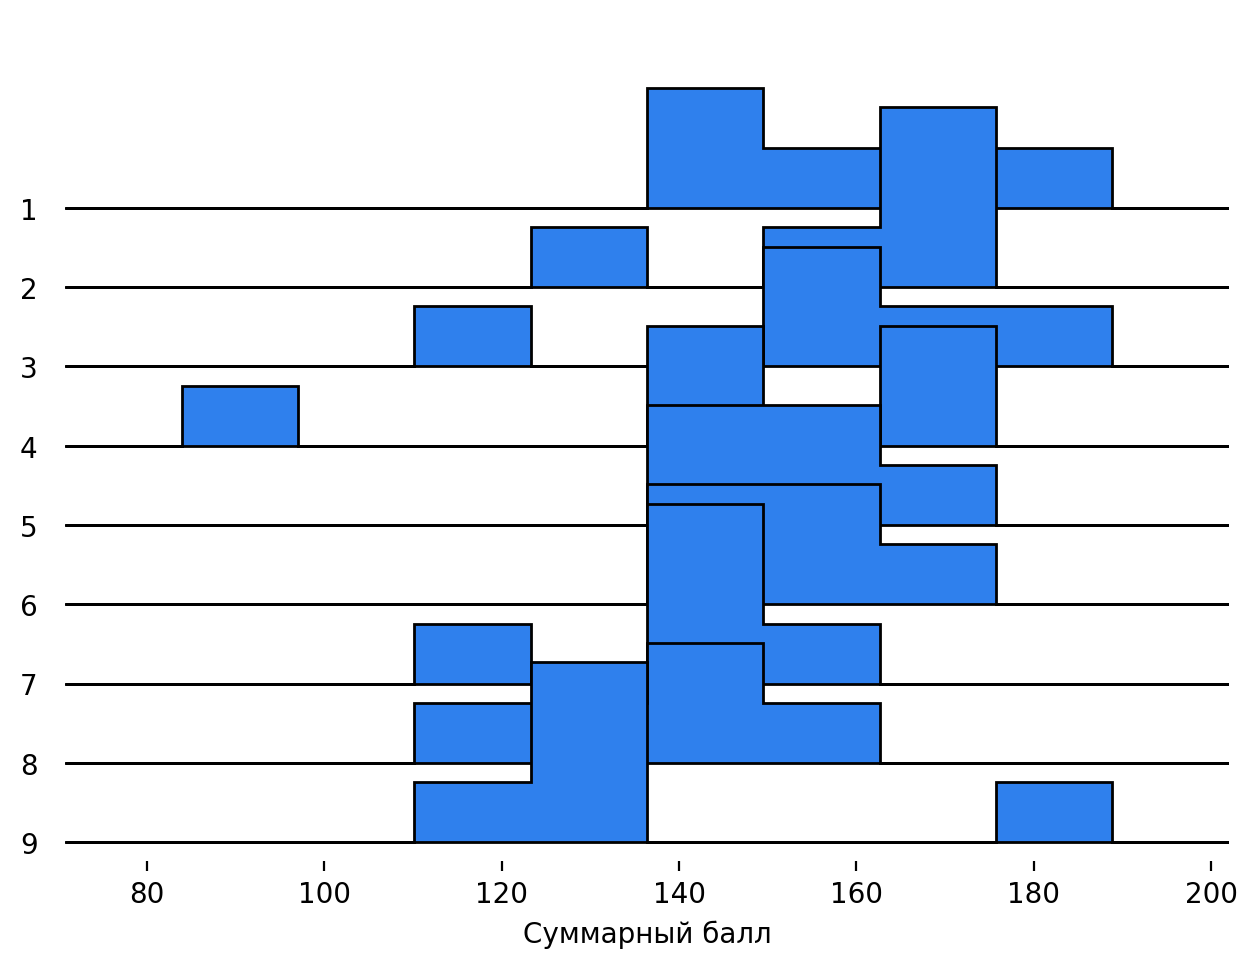

In [37]:
fig, ax = plt.subplots(dpi=200)

joypy.joyplot(
    df[df.Place < 10].groupby('Place', sort=True),
    column='Total',
#     by='Country',
    hist=True,
    color=COLOR,
    histtype='stepfilled',
    ax=ax
)

plt.xlabel('Суммарный балл')
plt.show()

# Как менялись баллы на регионе за год

In [67]:
temp1 = pd.read_csv(PATH + 'РЭ ВОШ экономика 2020.csv', sep='\t')
temp2 = pd.read_csv(PATH + 'РЭ ВОШ экономика 2021.csv', sep='\t')
temp3 = pd.read_csv(PATH + 'РЭ ВОШ экономика 2022.csv', sep='\t')
temp4 = pd.read_csv(PATH + 'РЭ ВОШ экономика 2023.csv', sep='\t')

In [68]:
temp1['год'] = 2020
temp2['год'] = 2021
temp3['год'] = 2022
temp4['год'] = 2023

In [69]:
temp1 = temp1.rename(columns={'Сумма': 'Балл'})
temp1 = temp1.dropna()

In [70]:
temp = temp1.merge(temp2, on='Ф.И.О.')
temp = pd.concat([temp, temp2.merge(temp3, on='Ф.И.О.'), temp3.merge(temp4, on='Ф.И.О.')])

In [71]:
temp['Балл_x'].corr(temp['Балл_y'])

0.6429829890998161

Text(0, 0.5, 'балл на регионе следующего года')

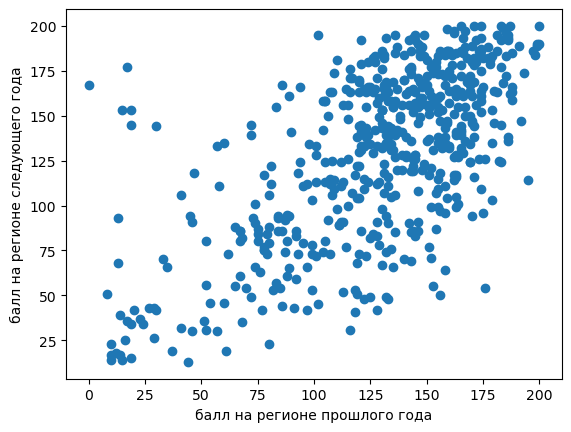

In [72]:
plt.scatter(temp['Балл_x'], temp['Балл_y'])

plt.xlabel('балл на регионе прошлого года')
plt.ylabel('балл на регионе следующего года')